## Support Vector Regression on Admission Dataset

![](https://images.indianexpress.com/2019/04/tnea-couns.jpg)

## Problem Statement 
- Predict the chances of admission based on the given attributes

## Task we have performed:
1. Data ingestion
2. EDA
3. Graphical Analysis (DATA Visualization)
4. check correlation between features
5. Perform Train Test Split
6. SVR Model Training
7. Check Performance Metrics
      - mean_sqaured_error
      - mean_absolute_error
8. R Sqaure
9. Adjusted R Square
10. Hypter-Parameter Tuning
11. Again check performance metrics after hyper-parameter tunning
      - mean_sqaured_error
      - mean_absolute_error
      - R Sqaure
      - Adjusted R Square

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## Data ingestion

In [2]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Admision prediction.csv")
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.columns

Index(['Unnamed: 0', 'Serial No.', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0','Serial No.'],axis = 1,inplace= True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


### Rename the columns

In [6]:
df.rename(columns = {"GRE Score":"GRE_Score", "TOEFL Score":"TOEFL_Score","University Rating" : "University_Rating", "Chance_of_Admit'":"Chance_of_Admit"},inplace = True)

In [7]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          485 non-null    float64
 1   TOEFL_Score        490 non-null    float64
 2   University_Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [9]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.shape

(500, 8)

### Check the duplcate values

In [11]:
df[df.duplicated()]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit


### Checking For Null Values

In [12]:
df.isna().sum()

GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

### Fill the null values with the mean

In [13]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [14]:
df['GRE_Score'] = df['GRE_Score'].fillna(round(df['GRE_Score'].mean()))
df['TOEFL_Score'] = df['TOEFL_Score'].fillna(round(df['TOEFL_Score'].mean()))
df['University_Rating'] = df['University_Rating'].fillna(round(df['University_Rating'].mean()))

In [15]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Check the outliers

### Box plot

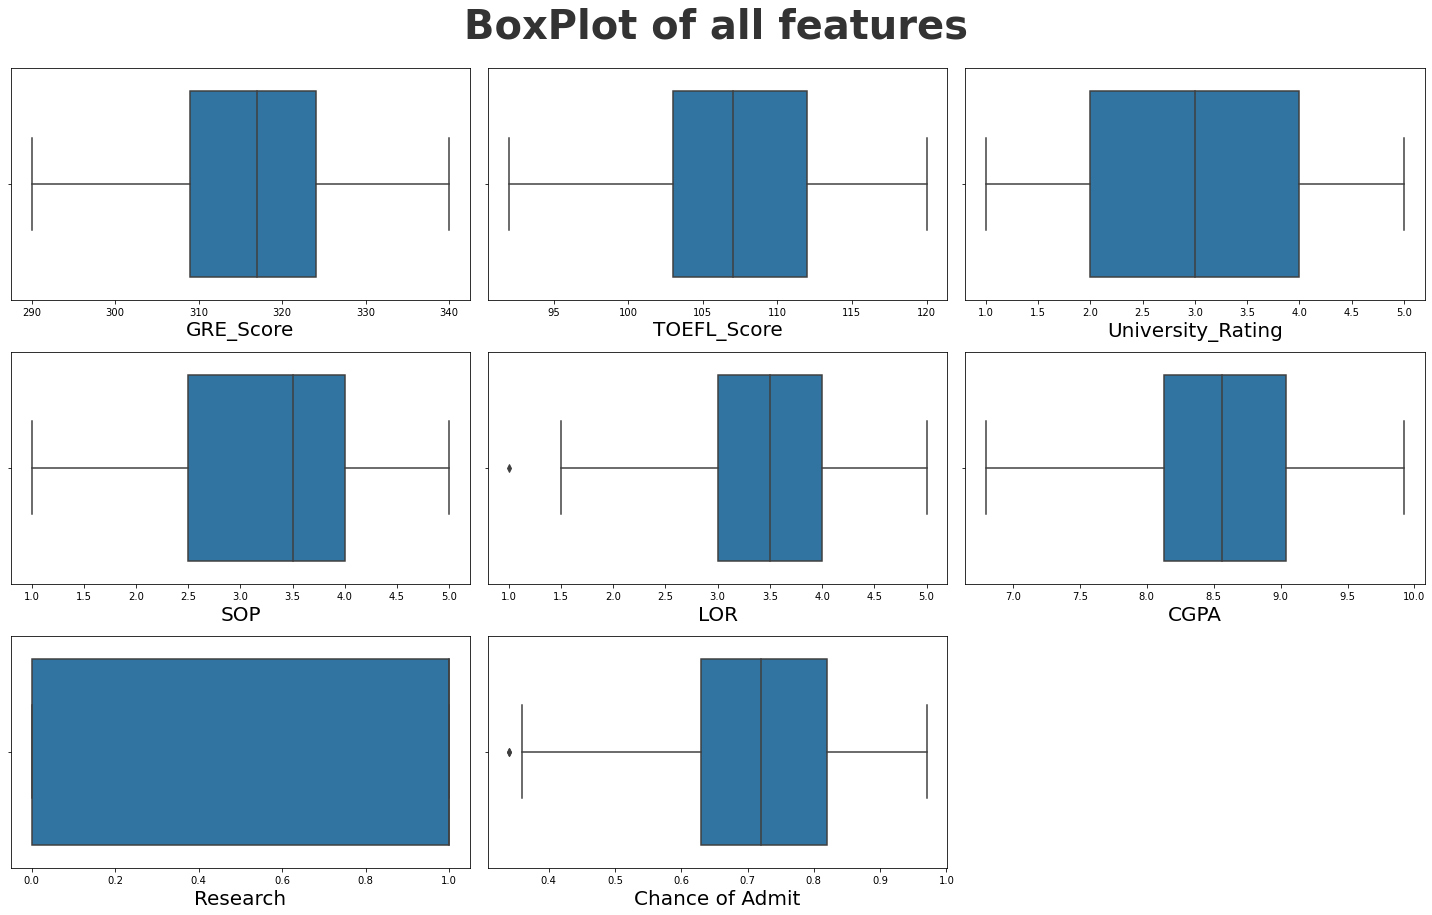

In [16]:
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x= df[df.columns[i]], data = df)
    plt.xlabel(df.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

### Obeservation
Very Few outliers are present in the dataset, this will not affect our model so we do not handle it 

## Graphical Analysis (DATA Visualization)

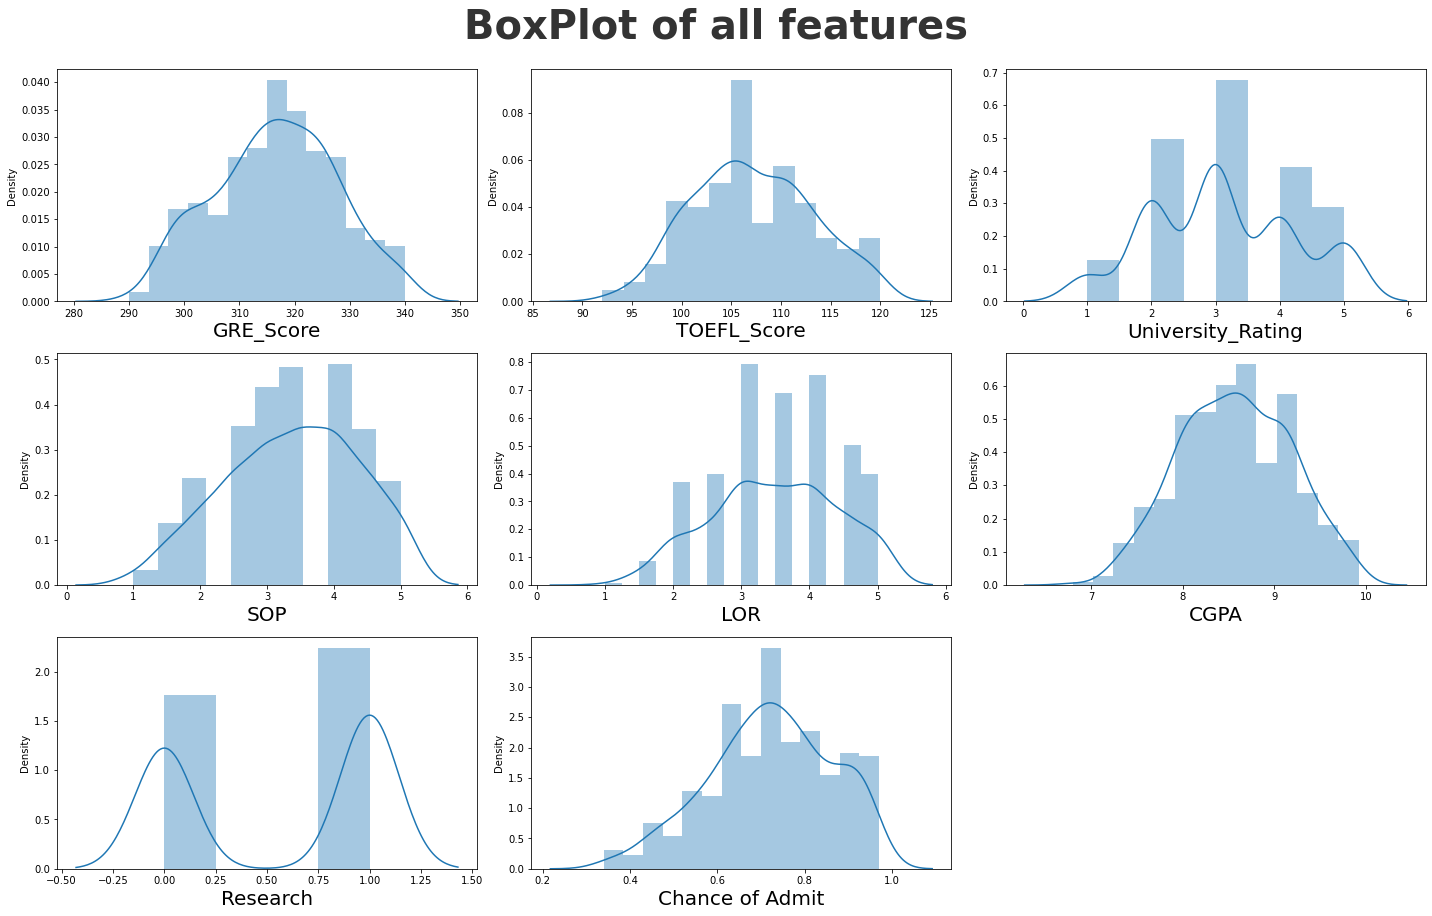

In [17]:
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(x= df[df.columns[i]])
    plt.xlabel(df.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

### Correlation

In [18]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE_Score,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL_Score,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University_Rating,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

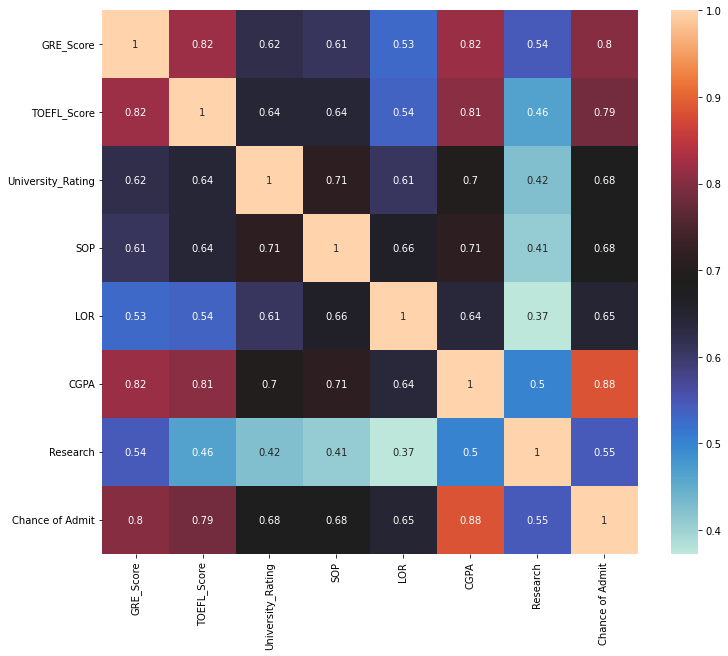

In [19]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap='icefire')

### Splitting data into independet and dependent features

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [22]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

## Train Test split

In [24]:
## random state train test split ....
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [25]:
X_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
471,311.0,103.0,3.0,2.0,4.0,8.09,0
26,322.0,109.0,5.0,4.5,3.5,8.80,0
7,308.0,101.0,2.0,3.0,4.0,7.90,0
453,319.0,103.0,3.0,2.5,4.0,8.76,1
108,331.0,116.0,5.0,5.0,5.0,9.38,1


In [26]:
X_train.shape,y_train.shape

((335, 7), (335,))

In [27]:
X_test.shape,y_test.shape

((165, 7), (165,))

### StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [29]:
X_train =scaler.fit_transform(X_train)
X_train

array([[-5.45279323e-01, -7.01035861e-01, -8.61745113e-02, ...,
         5.38819022e-01, -8.35765678e-01, -1.14470294e+00],
       [ 4.69546084e-01,  2.85025777e-01,  1.66342920e+00, ...,
        -1.61323061e-03,  3.63045482e-01, -1.14470294e+00],
       [-8.22049889e-01, -1.02972307e+00, -9.60976368e-01, ...,
         5.38819022e-01, -1.15657430e+00, -1.14470294e+00],
       ...,
       [-1.37559102e+00, -1.35841029e+00, -1.83577823e+00, ...,
        -1.62290999e+00, -2.25407747e+00, -1.14470294e+00],
       [-7.29793033e-01, -3.72348648e-01, -9.60976368e-01, ...,
         5.38819022e-01, -1.52803691e+00, -1.14470294e+00],
       [-2.68508758e-01, -2.08005042e-01, -9.60976368e-01, ...,
        -1.61323061e-03, -5.65611050e-01, -1.14470294e+00]])

In [30]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.57662835e+00,  1.43543102e+00,  7.88627346e-01, ...,
        -1.61323061e-03,  1.61251063e+00,  8.73589088e-01],
       [-2.68508758e-01,  1.20682171e-01,  7.88627346e-01, ...,
         5.38819022e-01,  7.68277423e-01,  8.73589088e-01],
       [-1.76251902e-01, -3.72348648e-01, -9.60976368e-01, ...,
        -1.08247774e+00, -1.57869090e+00, -1.14470294e+00],
       ...,
       [-8.39950473e-02, -7.01035861e-01, -9.60976368e-01, ...,
         1.07925128e+00,  2.61737496e-01, -1.14470294e+00],
       [-6.37536178e-01, -1.35841029e+00, -9.60976368e-01, ...,
        -1.62290999e+00, -2.16965415e+00, -1.14470294e+00],
       [ 8.26180793e-03, -2.08005042e-01, -1.83577823e+00, ...,
        -1.61323061e-03, -1.57869090e+00,  8.73589088e-01]])

## SVR Model

In [31]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(X_train,y_train)

SVR()

In [32]:
y_pred = regression.predict(X_test)
y_pred

array([0.86817586, 0.78381503, 0.57919574, 0.68776952, 0.79439379,
       0.84743105, 0.50171033, 0.6328119 , 0.78957916, 0.75818072,
       0.65436264, 0.70519786, 0.65328173, 0.87229071, 0.81272357,
       0.46396312, 0.78826018, 0.59247838, 0.49116878, 0.60358816,
       0.65586878, 0.61633488, 0.69401787, 0.70125121, 0.7306518 ,
       0.5865494 , 0.87402932, 0.83488954, 0.62479868, 0.72564384,
       0.5550858 , 0.71302285, 0.57115598, 0.84909071, 0.62762574,
       0.68927902, 0.50776722, 0.81791217, 0.63304541, 0.6809731 ,
       0.86318472, 0.56233921, 0.64817504, 0.85738211, 0.84872702,
       0.55864135, 0.89758476, 0.81012598, 0.74054261, 0.87390643,
       0.82908825, 0.58610923, 0.71086135, 0.5011529 , 0.88303906,
       0.59799981, 0.85593607, 0.70669597, 0.68232427, 0.48531637,
       0.63384423, 0.65854597, 0.57107234, 0.60456737, 0.45790852,
       0.57292054, 0.86601987, 0.85203547, 0.6347303 , 0.65992005,
       0.61291378, 0.72230055, 0.66038355, 0.56688316, 0.50314

## Peformance Matrics

In [33]:
# Performance matrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.0050735795747495135
0.05874253823892985


## R-Square & Adjusted R-Square

In [37]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
print("R-Square:",score)

R-Square: 0.753750387888641


In [42]:
## Adjuste r2 
adjusted_r_2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R_2:",adjusted_r_2)

Adjusted R_2: 0.7427711058199817


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Hyper-parameter Tuning

In [46]:
# Hyper-parameter tuning the SVM model
param_grid = {'kernel':['rbf','linear','poly']}

grid = GridSearchCV(estimator = SVR(),
                    param_grid=param_grid,
                            cv=5,
                            n_jobs= -1)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly']})

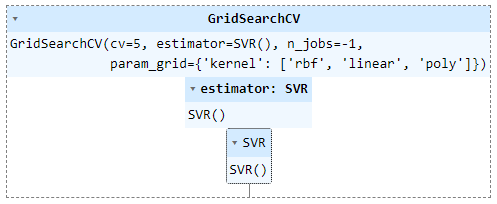

In [49]:
#prdicting data
svr_pred = grid.predict(X_test)

## r2 score
svr_r2Score = metrics.r2_score(y_test,svr_pred)
print("SVR R2 score:",svr_r2Score)

## Adjusted r2 score
Adjusted_r2 = 1 - (1-svr_r2Score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("SVR Adjusted R2:",Adjusted_r2)

SVR R2 score: 0.8018295745415123
SVR Adjusted R2: 0.7929939504764841


In [53]:
print("After Hyper-parameter Tuning")
print(mean_squared_error(y_test,svr_pred))
print(mean_absolute_error(y_test,svr_pred))

After Hyper-parameter Tuning
0.004082984798655958
0.049113186798944365


## Before and After Hyperparameter Tuning

In [51]:
print(f"Before Hyper-parameter Tuning\n R-Square: {score} \n Adjusted R_2: {adjusted_r_2}\n")
print(f"After Hyper-parameter Tuning\n R-Square: {svr_r2Score} \n Adjusted R_2: {Adjusted_r2}")

Before Hyper-parameter Tuning
 R-Square: 0.753750387888641 
 Adjusted R_2: 0.7427711058199817

After Hyper-parameter Tuning
 R-Square: 0.8018295745415123 
 Adjusted R_2: 0.7929939504764841
